#STEPS
1.IMPORTING THE LIBRARIES

2.IMPORTING THE DATASETS

3.DATA CLEANING, DATA EXPLORATION, DATA MANIPULATION, DATA VISUALISATION

4.EDA(EXPLORATORY DATA ANALYSIS)

5.SPLITTING THE DATASET

6.CHOOSING THE MODEL

7.TRAINING THE MODEL

8.TESTING THE MODEL

9.MODEL EVALUATION

10.EXPORT THE DATASET INTO .CSV FORMAT

# IMPORTING THE LIBARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR


#Problem Statement
Given a dataset which captures the salary from July 1st ,2013 to June 30 2014 .It includes only those employees who are employed on june 30 2014 .Predict the salary of employes working on Baltiomore

#Importing the dataset

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Lochana24/Baltimore-Salary-Prediction/main/train.csv")



In [4]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [5]:
df.tail()# total

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [6]:
df.shape

(18981, 7)

#Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [8]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Streeter,Catherine F",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [9]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [10]:
df.rename(columns={' Name':'Name'},inplace=True)

In [11]:
df.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [12]:
df.columns = df.columns.str.lower()

In [13]:
df.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')

In [14]:
#checking for null values
df.isnull().sum()

,0
name,0
jobtitle,0
agencyid,0
agency,0
hiredate,70
annualsalary,0
grosspay,3223


In [15]:
#Delete the column GrossPay
df.drop('grosspay',axis=1,inplace=True)

In [16]:
#count of each unique values of agencyid
df.jobtitle.value_counts()

,count
jobtitle,
AIDE BLUE CHIP,4817
POLICE OFFICER,1866
LABORER (Hourly),597
EMT Firefighter Suppression,358
CROSSING GUARD,337
...,...
TRANSPORTATION SAFETY SUPERVIS,1
DIRECTOR ADOLESCENT & REPRODUC,1
PUBLIC HEALTH DENTIST,1


In [17]:
df.agencyid.value_counts()

,count
agencyid,
P04001,316
C90786,276
W02629,193
P04002,191
A99416,166
...,...
A65113,1
W02654,1
W02690,1


In [18]:
df.annualsalary.value_counts()

,count
annualsalary,
$11310.00,4811
$20800.00,325
$29245.00,196
$43999.00,169
$44773.00,163
...,...
$33337.00,1
$74983.00,1
$10500.00,1


In [19]:
#Remove the '$" symbol from the annual salary

In [20]:
df.annualsalary=df.annualsalary.str.replace('$','')

In [21]:
df.annualsalary

,annualsalary
0,11310.00
1,53428.00
2,68300.00
3,62000.00
4,43999.00
...,...
18976,11310.00
18977,11310.00
18978,43999.00
18979,44104.00


In [22]:
#And convert each dtype into long integer

In [23]:
df.annualsalary=df.annualsalary.astype(float)

In [24]:
df.annualsalary=df.annualsalary.astype(int)

In [25]:
#After the column agency add the column hireday,hiremonth,hireyear by taking the values of hiredate
df['hiredate'] = pd.to_datetime(df['hiredate'], errors='coerce')
df['hireday'] = df['hiredate'].dt.day
df['hiremonth'] = df['hiredate'].dt.month
df['hireyear'] = df['hiredate'].dt.year


In [26]:
df.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'hireday', 'hiremonth', 'hireyear'],
      dtype='object')

In [27]:
# bring all the three columns 'hireday','hiremonth','hireyear' after the agency and before the hiredate
df.insert(4,'hireday',df.pop('hireday'))
df.insert(5,'hiremonth',df.pop('hiremonth'))
df.insert(6,'hireyear',df.pop('hireyear'))

In [28]:
df.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hireday', 'hiremonth',
       'hireyear', 'hiredate', 'annualsalary'],
      dtype='object')

In [29]:
#Now remove the column 'hiredate'
df.drop('hiredate',axis=1,inplace=True)

In [30]:
df

,name,jobtitle,agencyid,agency,hireday,hiremonth,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10.0,6.0,2013.0,11310
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24.0,10.0,1979.0,53428
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25.0,9.0,2006.0,68300
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23.0,7.0,2009.0,62000
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24.0,7.0,2013.0,43999
...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,21.0,5.0,2014.0,11310
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,21.0,5.0,2014.0,11310
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,17.0,12.0,2013.0,43999
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,23.0,1.0,2013.0,44104


In [31]:
df['hireday']=df['hireday'].astype('Int64')
df['hiremonth']=df['hiremonth'].astype('Int64')
df['hireyear']=df['hireyear'].astype('Int64')

In [32]:
df

,name,jobtitle,agencyid,agency,hireday,hiremonth,hireyear,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10,6,2013,11310
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24,10,1979,53428
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25,9,2006,68300
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23,7,2009,62000
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24,7,2013,43999
...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,21,5,2014,11310
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,21,5,2014,11310
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,17,12,2013,43999
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,23,1,2013,44104


#Data Visualisation

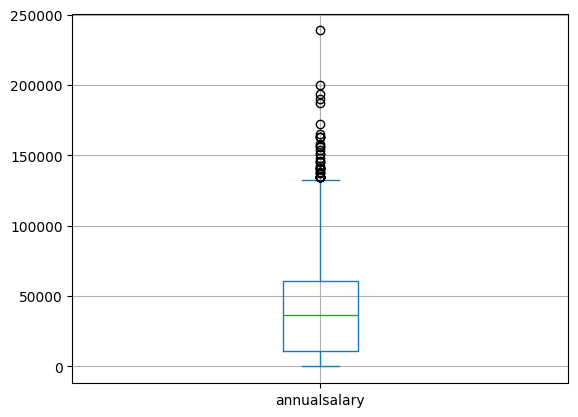

In [33]:
#Plot a box plot for annualsalary column
df.annualsalary.plot(kind='box')
plt.grid()

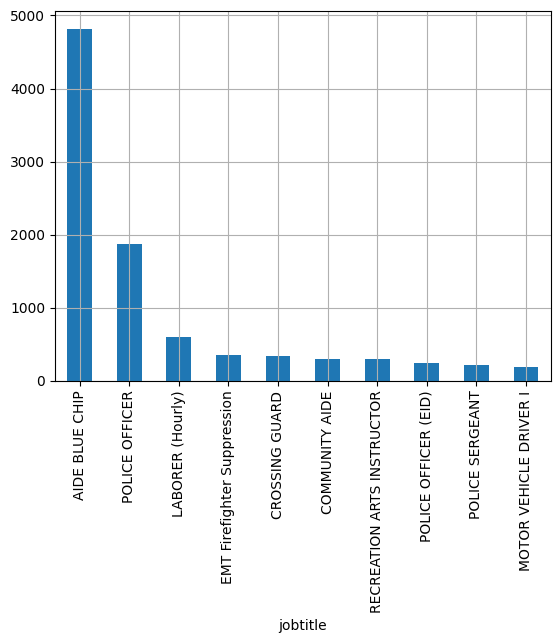

In [34]:
#plot top 10 jobs based on hiring
df.jobtitle.value_counts().head(10).plot(kind='bar')
plt.grid()


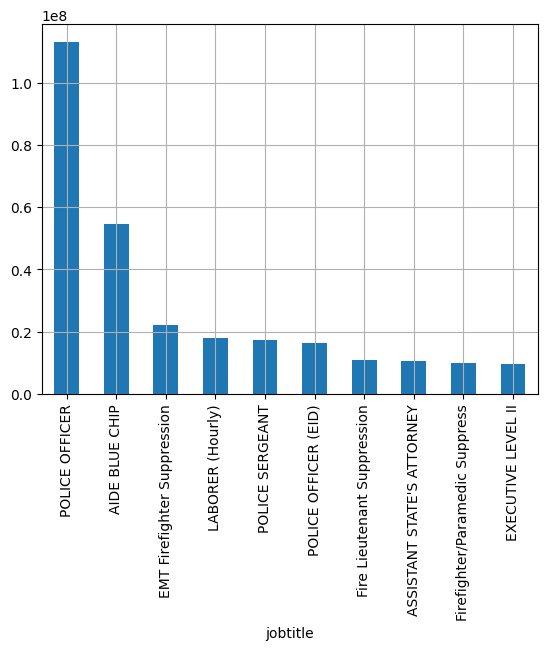

In [35]:
#plot 10 jobs with highest salary
df.groupby('jobtitle')['annualsalary'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.grid()

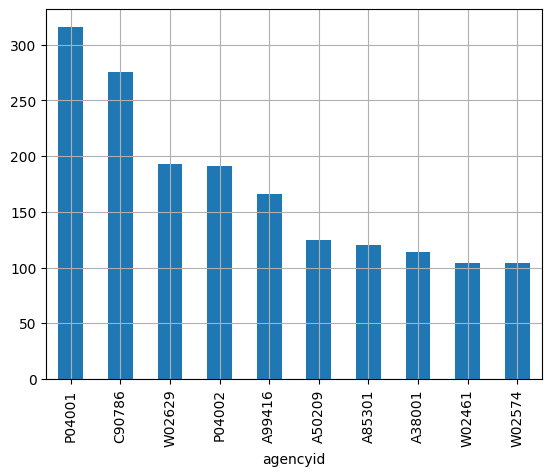

In [36]:
#plot top 10 AgencyId with more number of employess
df.agencyid.value_counts().head(10).plot(kind='bar')
plt.grid()

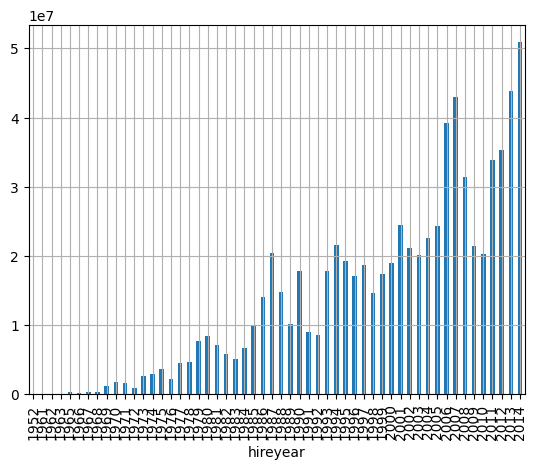

In [37]:
#plot highest salary with year graph
df.groupby('hireyear')['annualsalary'].sum().plot(kind='bar')
plt.grid()

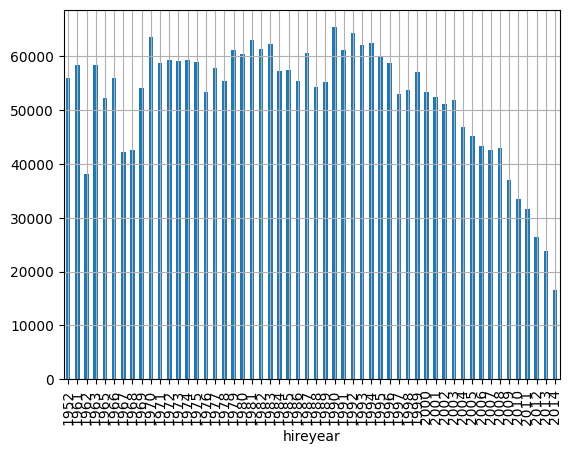

In [38]:
#plot average salary vs year graph
df.groupby('hireyear')['annualsalary'].mean().plot(kind='bar')
plt.grid()

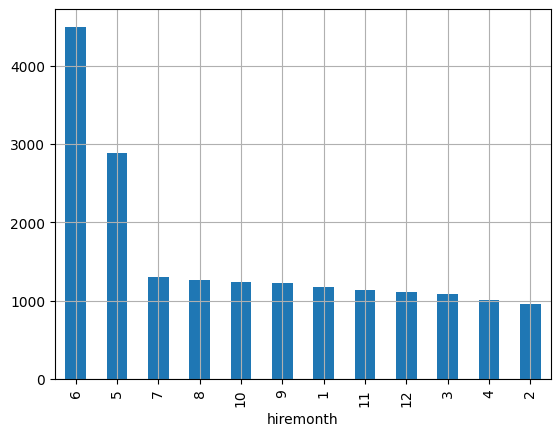

In [39]:
#plot the graph for hiremoth column where the most people got hired
df.hiremonth.value_counts().plot(kind='bar')
plt.grid()

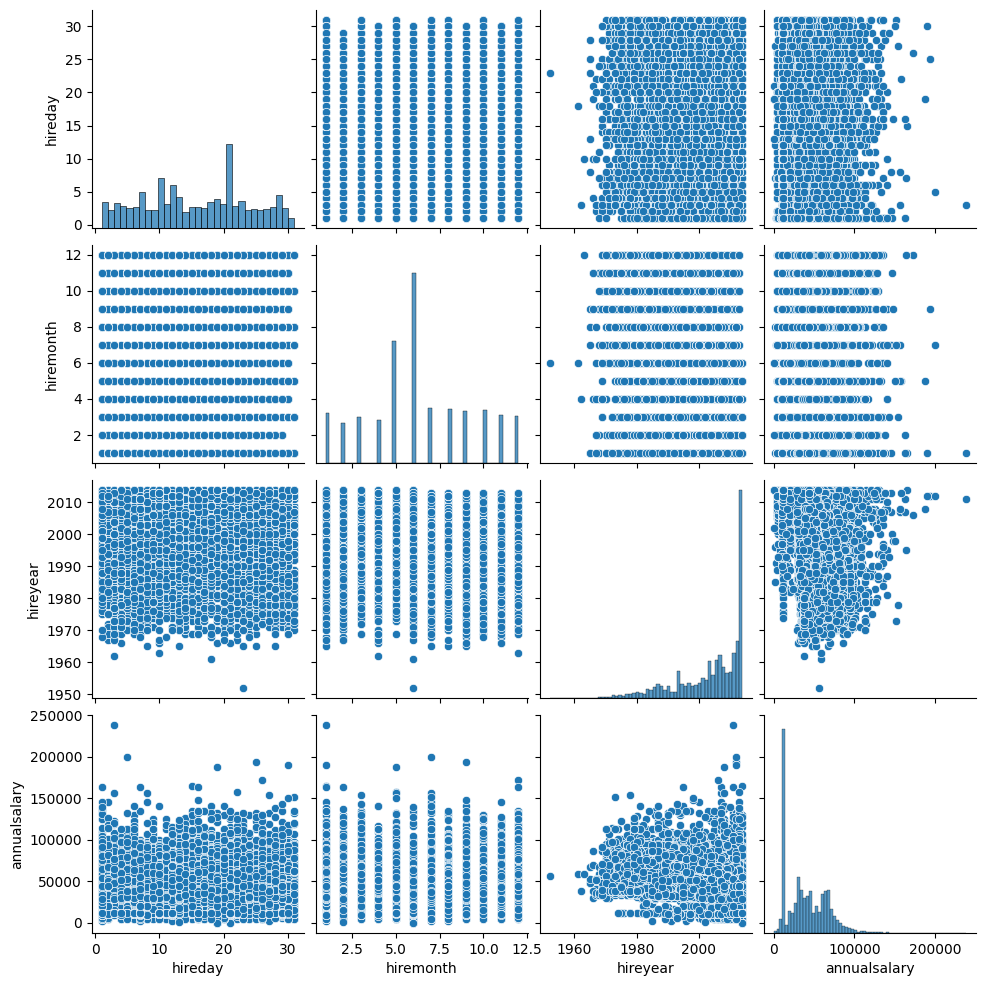

In [40]:
#plot a pairplot
sns.pairplot(df)

<Axes: >

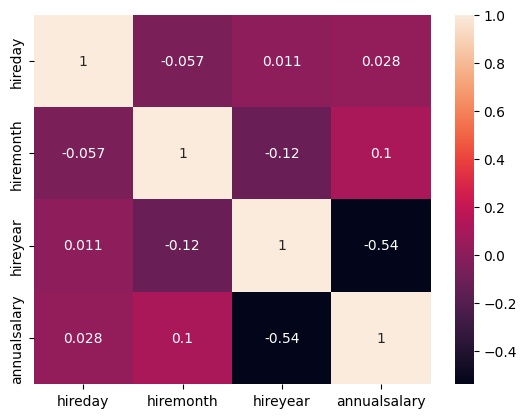

In [41]:
#plot a heatmap
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)


#Machine Learning

In [42]:
X = df.drop('annualsalary', axis=1).select_dtypes(include='number')
Y = df['annualsalary']


In [43]:
X.isna().sum()



,0
hireday,70
hiremonth,70
hireyear,70


In [44]:
X = X.fillna(X.median())

In [45]:
Y.isna().sum()

np.int64(0)

#Data preprocessing- Feature Scaling

In [46]:
stanscale=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
scaler_X = StandardScaler()
scaler_Y = StandardScaler()


In [47]:
X_train_scaled = scaler_X.fit_transform(x_train)
X_test_scaled  = scaler_X.transform(x_test)

y_train_scaled = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


* Splitting

#Choose the model(SVR)

In [48]:
model=SVR(kernel='rbf')

In [49]:
model.fit(X_train_scaled, y_train_scaled)


SVR()

In [50]:
y_pred_scaled = model.predict(X_test_scaled)


In [51]:
y_pred = scaler_Y.inverse_transform(
    y_pred_scaled.reshape(-1, 1)
)


In [52]:
y_pred

array([[62006.69083312],
       [52045.06766806],
       [54467.80771627],
       ...,
       [62351.07159561],
       [33185.09467173],
       [45849.30970182]])

In [53]:
y_test

,annualsalary
8085,30992
13028,55891
6296,38195
15395,29245
869,11310
...,...
17988,11310
3402,41368
3439,55891
8841,42903


In [54]:

r2_score(y_test,y_pred)

0.43711635229920254

#Conclusion

#If a employee joins on 02/09/2005,12/12/2090 what will be his salary

In [1]:
import pandas as pd
import numpy as np


In [55]:
# Function to convert date to numerical value
def convert_date(date_str):
    reference_date = pd.to_datetime("01/01/2000")
    date = pd.to_datetime(date_str, dayfirst=True)
    return (date - reference_date).days


In [60]:
# Given joining dates
dates = ["02/09/2005", "12/12/2090"]

In [61]:
X_new = np.array([convert_date(d) for d in dates])


In [65]:
scaler = StandardScaler()


In [67]:
new_data = []
for date_str in dates:
    dt_obj = pd.to_datetime(date_str, dayfirst=True)
    new_data.append({'hireday': dt_obj.day, 'hiremonth': dt_obj.month, 'hireyear': dt_obj.year})
X_new_df = pd.DataFrame(new_data)

X_new_scaled = scaler_X.transform(X_new_df)

In [72]:
predicted_salaries = model.predict(X_new_scaled)
predicted_salaries = predicted_salaries.reshape(-1, 1)
actual_salaries = scaler_Y.inverse_transform(predicted_salaries)


for d, salary in zip(dates, actual_salaries):
    print(f"Predicted salary for joining date {d}: {salary[0]:.2f}")

Predicted salary for joining date 02/09/2005: 39300.77
Predicted salary for joining date 12/12/2090: 42429.38
